In [1]:
import numpy as np
from numpy import ma
import math
import scipy
import scipy.constants as constants
import os
from IPython.display import Image

import xarray as xr
from netCDF4 import Dataset

# from cartopy import config
# import cartopy.crs as ccrs
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

import pandas as pd
import datetime
from tqdm import tqdm

In [16]:
df = xr.open_dataset("./bin_Figure_6.2a/output.nc")
df

<xarray.Dataset>
Dimensions:      (expt_id: 1, time: 14401)
Coordinates:
  * time         (time) datetime64[ns] 2000-01-01 ... 2000-01-11
  * expt_id      (expt_id) float32 0.0
Data variables:
    spc_H2O      (time, expt_id) float32 ...
    spc_SO2      (time, expt_id) float32 ...
    spc_H2SO4    (time, expt_id) float32 ...
    spc_bin001   (time, expt_id) float32 ...
    rwet_bin001  (time, expt_id) float32 ...
    spc_bin002   (time, expt_id) float32 ...
    rwet_bin002  (time, expt_id) float32 ...
    spc_bin003   (time, expt_id) float32 ...
    rwet_bin003  (time, expt_id) float32 ...
    spc_bin004   (time, expt_id) float32 ...
    rwet_bin004  (time, expt_id) float32 ...
    spc_bin005   (time, expt_id) float32 ...
    rwet_bin005  (time, expt_id) float32 ...
    spc_bin006   (time, expt_id) float32 ...
    rwet_bin006  (time, expt_id) float32 ...
    spc_bin007   (time, expt_id) float32 ...
    rwet_bin007  (time, expt_id) float32 ...
    spc_bin008   (time, expt_id) float32 ...
    rwet_bin008  (time, expt_id) float32 ...
    spc_bin009   (time, expt_id) float32 ...
    rwet_bin009  (time, expt_id) float32 ...
    spc_bin010   (time, expt_id) float32 ...
    rwet_bin010  (time, expt_id) float32 ...
    spc_bin011   (time, expt_id) float32 ...
    rwet_bin011  (time, expt_id) float32 ...
    spc_bin012   (time, expt_id) float32 ...
    rwet_bin012  (time, expt_id) float32 ...
    spc_bin013   (time, expt_id) float32 ...
    rwet_bin013  (time, expt_id) float32 ...
    spc_bin014   (time, expt_id) float32 ...
    rwet_bin014  (time, expt_id) float32 ...
    spc_bin015   (time, expt_id) float32 ...
    rwet_bin015  (time, expt_id) float32 ...
    spc_bin016   (time, expt_id) float32 ...
    rwet_bin016  (time, expt_id) float32 ...
    spc_bin017   (time, expt_id) float32 ...
    rwet_bin017  (time, expt_id) float32 ...
    spc_bin018   (time, expt_id) float32 ...
    rwet_bin018  (time, expt_id) float32 ...
    spc_bin019   (time, expt_id) float32 ...
    rwet_bin019  (time, expt_id) float32 ...
    spc_bin020   (time, expt_id) float32 ...
    rwet_bin020  (time, expt_id) float32 ...
    spc_bin021   (time, expt_id) float32 ...
    rwet_bin021  (time, expt_id) float32 ...
    spc_bin022   (time, expt_id) float32 ...
    rwet_bin022  (time, expt_id) float32 ...
    spc_bin023   (time, expt_id) float32 ...
    rwet_bin023  (time, expt_id) float32 ...
    spc_bin024   (time, expt_id) float32 ...
    rwet_bin024  (time, expt_id) float32 ...
    spc_bin025   (time, expt_id) float32 ...
    rwet_bin025  (time, expt_id) float32 ...
    spc_bin026   (time, expt_id) float32 ...
    rwet_bin026  (time, expt_id) float32 ...
    spc_bin027   (time, expt_id) float32 ...
    rwet_bin027  (time, expt_id) float32 ...
    spc_bin028   (time, expt_id) float32 ...
    rwet_bin028  (time, expt_id) float32 ...
    spc_bin029   (time, expt_id) float32 ...
    rwet_bin029  (time, expt_id) float32 ...
    spc_bin030   (time, expt_id) float32 ...
    rwet_bin030  (time, expt_id) float32 ...
    spc_bin031   (time, expt_id) float32 ...
    rwet_bin031  (time, expt_id) float32 ...
    spc_bin032   (time, expt_id) float32 ...
    rwet_bin032  (time, expt_id) float32 ...
    spc_bin033   (time, expt_id) float32 ...
    rwet_bin033  (time, expt_id) float32 ...
    spc_bin034   (time, expt_id) float32 ...
    rwet_bin034  (time, expt_id) float32 ...
    spc_bin035   (time, expt_id) float32 ...
    rwet_bin035  (time, expt_id) float32 ...
    spc_bin036   (time, expt_id) float32 ...
    rwet_bin036  (time, expt_id) float32 ...
    spc_bin037   (time, expt_id) float32 ...
    rwet_bin037  (time, expt_id) float32 ...
    spc_bin038   (time, expt_id) float32 ...
    rwet_bin038  (time, expt_id) float32 ...
    spc_bin039   (time, expt_id) float32 ...
    rwet_bin039  (time, expt_id) float32 ...
    spc_bin040   (time, expt_id) float32 ...
    rwet_bin040  (time, expt_id) float32 ...
    spc_bin041   (time, expt_id) float32 ...
    rwet_bin041  (time, exp

In [17]:
Nbin = 150

Nt = len(df['time'])
Nid = len(df['expt_id'])
Aerosol = np.zeros([Nbin,Nt,Nid])

for Id in range(1,Nbin+1,1):
    VarName = f'spc_bin{Id:03d}'
    Aerosol[Id-1,:,:] = df[VarName]*df['dens_air'] # [#/cm3]
    


In [18]:
# Aerosol[:,0,0]

In [19]:
# Generate radius data

if Nbin==40: 
    vol_ratio = 2.0
elif Nbin==150: 
    vol_ratio = 1.2
else:
    print("*** vol_ratio value? ***")
    

r0 = 3.9376e-4 # um
v0 = (4.0/3.0)*np.pi*np.power(r0,3) # um^3
aer_vol_dry = [np.power(vol_ratio,x) * v0 for x in range(Nbin)] #um^3
aer_vol_dry = np.array(aer_vol_dry)
aer_r_dry = ( aer_vol_dry / (4/3*np.pi) )**(1/3)

In [20]:
Aerosol.shape, len(aer_vol_dry)

((150, 14401, 1), 150)

In [21]:
avog_num = constants.N_A

num_bin = np.zeros((Nbin, Nt, Nid))

for i_bin in range(Nbin):
    num_bin[i_bin,:,:] = Aerosol[i_bin,:,:] / (1.8e-12 * aer_vol_dry[i_bin] * avog_num / 98.076)  # num / cm3 air

# 1.8e-12 is the density of liquid H2SO4

In [22]:
num_bin[:,0,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
radius = aer_r_dry

# r_edge
r_edge = []
r_edge.append(radius[0]-0.5*(radius[1]-radius[0]))
for i in range(1,Nbin,1):
#     print(i)
    r_edge.append(0.5*(radius[i]+radius[i-1]))
r_edge.append(radius[Nbin-1]+0.5*(radius[Nbin-1]-radius[Nbin-2]))


# Dr
Dr = []
for i in range(1,Nbin+1,1):
    Dr.append( r_edge[i]-r_edge[i-1] )


# Dlog_r
Dlog_r = []
for i in range(1,Nbin+1,1):
    Dlog_r.append( np.log(r_edge[i])-np.log(r_edge[i-1]) )
# print(Dlog_r)

Dlog_R = 0.0607738 # np.mean(Dlog_r[1:-1])

In [24]:
# Dr/radius

In [25]:
# fig = plt.figure(dpi=100)

# plt.plot(aer_r_dry[:], num_bin[:,1,0],  'g-',  label='1 min')
# # plt.plot(aer_r_dry[:], num_bin[:,61,0], 'c--', label='1 hour')
# # plt.plot(aer_r_dry[:], num_bin[:,60*24+1,0], 'r-',  label='1 day')
# plt.plot(aer_r_dry[:], num_bin[:,-1,0], 'b-',  label='10 day')


# plt.xscale("log")
# plt.yscale("log")

# # plt.ylim(1e-2,1e9)
# plt.xlim(3e-4,1e0)


# plt.xlabel('Aerosol radius [um]')
# plt.ylabel('Aerosol number concentration [#/cm3]');
# plt.legend();

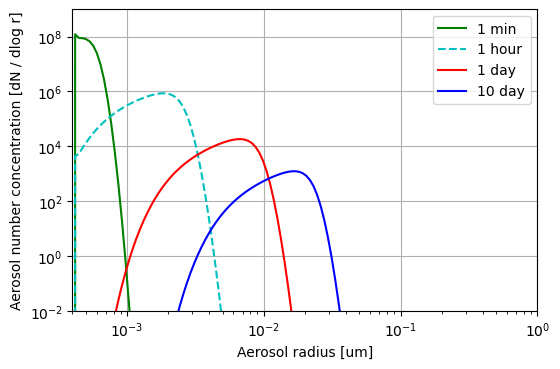

In [26]:
fig = plt.figure(dpi=100)

plt.plot(aer_r_dry[:], num_bin[:,1,0]/Dlog_r,  'g-',  label='1 min')
plt.plot(aer_r_dry[:], num_bin[:,60,0]/Dlog_r, 'c--', label='1 hour')
plt.plot(aer_r_dry[:], num_bin[:,60*24+1,0]/Dlog_r, 'r-',  label='1 day')
plt.plot(aer_r_dry[:], num_bin[:,-1,0]/Dlog_r, 'b-',  label='10 day')

plt.grid()
plt.xscale("log")
plt.yscale("log")

plt.ylim(1e-2,1e9)
plt.xlim(4e-4,1e0)


plt.xlabel('Aerosol radius [um]')
plt.ylabel('Aerosol number concentration [dN / dlog r]');
plt.legend();

In [27]:
# fig = plt.figure(dpi=150)

# plt.plot(aer_r_dry[:], num_bin[:,0,0]/Dlog_R,  'k-',  label='initial')
# plt.plot(aer_r_dry[:], num_bin[:,10,0]/Dlog_R,  'g-',  label='10 min')
# plt.plot(aer_r_dry[:], num_bin[:,60,0]/Dlog_R, 'c--', label='1 hour')
# # plt.plot(aer_r_dry[:], num_bin[:,60*24,0]/Dlog_r, 'r-',  label='1 day')
# # plt.plot(aer_r_dry[:], num_bin[:,60*24*5+1,0]/Dlog_r, 'm--',  label='5 day')

# plt.plot(aer_r_dry[:], num_bin[:,-1,0]/Dlog_r, 'b-',  label='10 day')

# plt.grid()

# plt.xscale("log")
# plt.yscale("log")

# plt.ylim(1e-2,1e9)
# plt.xlim(4e-4,3.4e0)


# plt.xlabel('Aerosol radius [um]')
# plt.ylabel('Aerosol number concentration [dN / dlog r]');
# plt.legend();

In [28]:
np.mean(Dlog_r[1:-1])

0.06077385226465152